In [1]:
# Comunidades

In [2]:
# Import de bibliotecas
import igraph
from igraph import Graph, plot
import numpy as np

In [3]:
# Carregamento de grafo no formato xml
grafo = igraph.load('./dados/Grafo.graphml')
print(grafo)

IGRAPH D-W- 53 179 --
+ attr: Handicapped (v), Lokationposition1highest53lowest (v), Repeater (v),
  Sweetsgiver (v), b (v), g (v), id (v), label (v), r (v), size (v), x (v), y
  (v), Edge Label (e), id (e), weight (e)
+ edges:
 0 ->  3  4 36                              29 ->  0 13 45 49
 1 -> 14 24 50                              30 -> 13 14 23 29 40
 2 ->  1  3  8 15 35                        31 -> 35
 3 ->  9 13 22 35 45 48                     32 -> 21 26
 4 ->  0  5 13 23                           33 ->
 5 ->  1  3  4 13                           34 ->  4
 6 -> 10 15                                 35 ->  6 10 22 23 28 31 44 46 49
 7 ->                                       36 -> 10 49
 8 -> 40 49                                 37 ->  0  2 10 14 16 17 22 24 35
38 40 48
 9 ->  3                                    38 -> 22 32 36
10 ->  6  8 13 14 27                        39 ->
11 -> 43                                    40 ->  8 12 20 23 50
12 -> 40                                

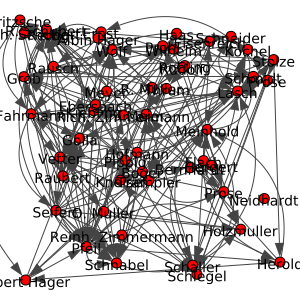

In [4]:
# Visualização do grafo
plot(grafo, bbox = (300, 300))

In [5]:
# Visualização das comunidades
comunidades = grafo.clusters()
print(comunidades)

Clustering with 53 elements and 11 clusters
[ 0] 51, 52
[ 1] 47
[ 2] 42
[ 3] 39
[ 4] 34
[ 5] 33
[ 6] 25
[ 7] 19
[ 8] 7
[ 9] 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22,
     23, 24, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 40, 41, 43, 44, 45,
     46, 48, 49, 50
[10] 18


In [6]:
# Visualização em qual comunidade um registro foi associado
comunidades.membership

[9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 7,
 9,
 9,
 9,
 9,
 9,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 5,
 4,
 9,
 9,
 9,
 9,
 3,
 9,
 9,
 2,
 9,
 9,
 9,
 9,
 1,
 9,
 9,
 9,
 0,
 0]

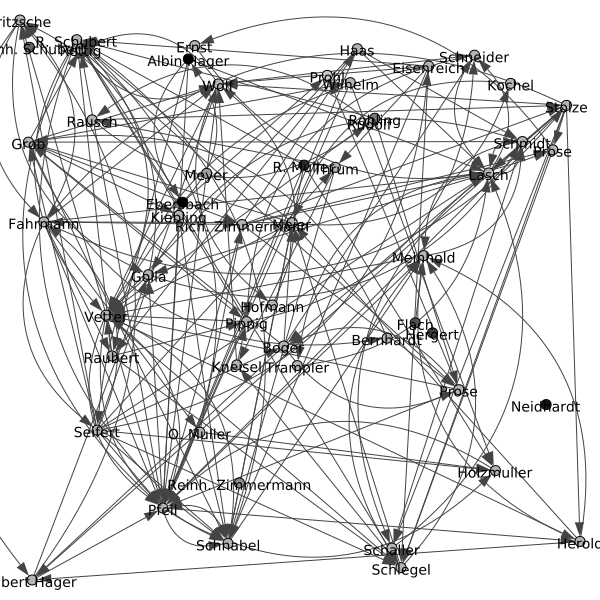

In [7]:
# Visualização do grafo
cores = comunidades.membership
# Array de cores para definirmos cores diferentes para cada grupo
cores = np.array(cores)
cores = cores * 20
cores = cores.tolist()
plot(grafo, vertex_color = cores)

In [27]:
# Criação de grafo direcionado com pesos nas arestas
grafo2 = Graph(edges = [(0,2), (0,1), (1,4), (1,5), (2,3), (6,7), (3,7), (4,7), (5,6)], directed = False)
grafo2.vs['label'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
grafo2.es['weight'] = [2,1,2,1,2,1,3,1]

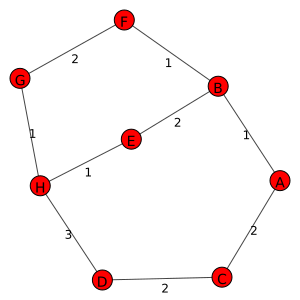

In [28]:
# Visualização do grafo
plot(grafo2, bbox = (300, 300), edge_label = grafo2.es['weight'])

In [29]:
# Visualização de comunidades e em qual comunidade cada registro foi enquadrado
comunidades2 = grafo2.clusters()
print(comunidades2)
comunidades2.membership

Clustering with 8 elements and 1 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7


[0, 0, 0, 0, 0, 0, 0, 0]

In [30]:
# Função mais otimizada para visualização das comunidades
c = grafo2.community_edge_betweenness()
print(c)
# Obtenção do numero de clusters
c.optimal_count
# Visualização da nova comunidade
comunidade3 = c.as_clustering()
print(comunidade3)
comunidade3.membership

Dendrogram, 8 elements, 7 merges

0 2 3 1 5 6 4 7
| | | | | | | |
| `-' | `-' `-'
|  |  |  |   | 
`--'  `--'   | 
 |     |     | 
 |     `-----' 
 |        |    
 `--------'
Clustering with 8 elements and 2 clusters
[0] 0, 2, 3
[1] 1, 4, 5, 6, 7


[0, 1, 0, 0, 1, 1, 1, 1]